In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import preprocessing
from sklearn.metrics.cluster import contingency_matrix
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors

In [2]:
# Read dataset
train_data = pd.read_csv("./data/train.csv")
test_data = pd.read_csv("./data/test.csv")

print(train_data.shape)
print(test_data.shape)
train_data.head()

(1200, 14)
(89, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,51,0,3,130,220,0,0,160,1,2,?,?,?,0
1,54,1,4,125,216,0,0,140,0,0,?,?,?,1
2,48,1,2,100,252,0,0,100,0,0,?,?,?,0
3,36,1,3,130,209,0,0,178,0,0,?,?,6,0
4,56,1,4,120,85,0,0,140,0,0,?,?,?,0


In [3]:
# Helper Function

def z_score(data):   
    z_score = (data - data.mean()) / data.std()
    return z_score

def encode_onehot(df):
    enc = preprocessing.OneHotEncoder(handle_unknown='ignore')
    new_df = enc.fit_transform(df).toarray()
    return new_df

def purity(y_train, y_pred):
    con_matrix = contingency_matrix(y_train, y_pred)
    return np.sum(np.amax(con_matrix, axis=0)) / np.sum(con_matrix) 

# Preprocessing

In [4]:
# Replace ? with NaN
train_data = train_data.replace('?', np.nan)
test_data = test_data.replace('?', np.nan)
print(train_data.isnull().sum(), "\n")
print(test_data.isnull().sum())

age            0
sex            0
cp             0
trestbps       0
chol           0
fbs            0
restecg        0
thalach        0
exang          0
oldpeak        0
slope       1129
ca          1197
thal        1181
num            0
dtype: int64 

age          0
sex          0
cp           0
trestbps     1
chol         9
fbs          0
restecg      0
thalach      1
exang        1
oldpeak      0
slope       56
ca          89
thal        80
num          0
dtype: int64


In [5]:
# Drop columns with high percentage of missing values
train_data = train_data.drop(['slope','ca','thal'], axis=1)
test_data = test_data.drop(['slope','ca','thal'], axis=1)

In [6]:
# Fill missing values with mode for categorical data and mean for the rest

mean_trestbps = train_data.mean().round(0).astype(np.int64)['trestbps']
mean_chol = train_data.mean().round(0).astype(np.int64)['chol']
mean_thalach = train_data.mean().round(0).astype(np.int64)['thalach']
train_data['exang'].value_counts()

0    969
1    231
Name: exang, dtype: int64

In [7]:
test_data['trestbps'] = test_data['trestbps'].fillna(mean_trestbps)
test_data['chol'] = test_data['chol'].fillna(mean_trestbps)
test_data['thalach'] = test_data['thalach'].fillna(mean_trestbps)
test_data['exang'] = test_data['exang'].fillna(0)

In [8]:
# Removing duplicates
print("Train Data Initial Shape       : " + str(train_data.shape))
train_data = train_data.drop_duplicates(keep='first')
print("Train Data after Duplicate Drops : " + str(train_data.shape))
print("Test Data Initial Shape       : " + str(test_data.shape))
test_data = test_data.drop_duplicates(keep='first')
print("Test Data after Duplicate Drops : " + str(test_data.shape))

Train Data Initial Shape       : (1200, 11)
Train Data after Duplicate Drops : (1075, 11)
Test Data Initial Shape       : (89, 11)
Test Data after Duplicate Drops : (89, 11)


In [9]:
corr = train_data.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
age,1.000000,-0.107089,0.054548,0.119263,-0.051992,0.120169,0.063250,-0.373249,0.145396,0.075378,0.070328
sex,-0.107089,1.000000,0.129129,0.070483,-0.003982,-0.017682,-0.209436,0.004379,0.020255,-0.081550,0.175996
cp,0.054548,0.129129,1.000000,0.083352,0.128005,-0.006424,-0.036257,-0.241609,0.460841,0.329491,0.489021
trestbps,0.119263,0.070483,0.083352,1.000000,-0.011026,0.006197,-0.106176,-0.166611,0.220986,0.129089,0.121009
chol,-0.051992,-0.003982,0.128005,-0.011026,1.000000,0.113573,0.115987,-0.022418,0.087375,0.058916,0.144643
fbs,0.120169,-0.017682,-0.006424,0.006197,0.113573,1.000000,0.138947,-0.090212,0.115765,-0.020186,0.095058
restecg,0.063250,-0.209436,-0.036257,-0.106176,0.115987,0.138947,1.000000,0.041517,-0.023308,-0.061259,-0.038419
thalach,-0.373249,0.004379,-0.241609,-0.166611,-0.022418,-0.090212,0.041517,1.000000,-0.283794,-0.190937,-0.226316
exang,0.145396,0.020255,0.460841,0.220986,0.087375,0.115765,-0.023308,-0.283794,1.000000,0.544079,0.541707
oldpeak,0.075378,-0.081550,0.329491,0.129089,0.058916,-0.020186,-0.061259,-0.190937,0.544079,1.000000,0.554616


Text(0.5, 1, 'Heatmap of Correlation')

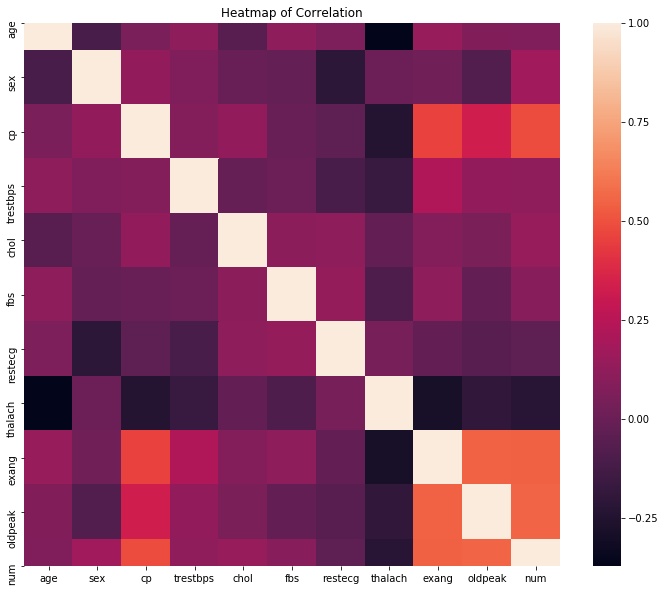

In [10]:
plt.figure(figsize=(12,10))
heat = sns.heatmap(corr)
plt.title('Heatmap of Correlation')

In [11]:
# Combining Train and Test Dataset
test_data['trestbps'] = test_data['trestbps'].astype(np.int64)
test_data['chol'] = test_data['chol'].astype(np.int64)
test_data['thalach'] = test_data['thalach'].astype(np.int64)
test_data['exang'] = test_data['exang'].astype(np.int64)
test_data['oldpeak'] = test_data['oldpeak'].astype(np.int64)

In [12]:
combined_data = pd.concat([train_data, test_data], axis = 0)
combined_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,51,0,3,130,220,0,0,160,1,2,0
1,54,1,4,125,216,0,0,140,0,0,1
2,48,1,2,100,252,0,0,100,0,0,0
3,36,1,3,130,209,0,0,178,0,0,0
4,56,1,4,120,85,0,0,140,0,0,0


In [13]:
combined_corr = combined_data.corr()
combined_corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
age,1.000000,-0.084129,0.074450,0.148773,-0.035068,0.133704,0.059967,-0.400544,0.177074,0.105437,0.098456
sex,-0.084129,1.000000,0.148896,0.080526,0.012366,-0.000130,-0.189548,-0.011687,0.043650,-0.047262,0.185198
cp,0.074450,0.148896,1.000000,0.090370,0.123767,0.009413,-0.015370,-0.262349,0.464798,0.335079,0.493510
trestbps,0.148773,0.080526,0.090370,1.000000,-0.003345,0.025243,-0.083786,-0.167776,0.220019,0.146378,0.133055
chol,-0.035068,0.012366,0.123767,-0.003345,1.000000,0.108649,0.119788,-0.035889,0.099164,0.072483,0.161258
fbs,0.133704,-0.000130,0.009413,0.025243,0.108649,1.000000,0.115476,-0.095517,0.120938,-0.003008,0.111463
restecg,0.059967,-0.189548,-0.015370,-0.083786,0.119788,0.115476,1.000000,0.026464,0.002528,-0.017729,-0.025025
thalach,-0.400544,-0.011687,-0.262349,-0.167776,-0.035889,-0.095517,0.026464,1.000000,-0.303584,-0.210786,-0.247008
exang,0.177074,0.043650,0.464798,0.220019,0.099164,0.120938,0.002528,-0.303584,1.000000,0.561659,0.549018
oldpeak,0.105437,-0.047262,0.335079,0.146378,0.072483,-0.003008,-0.017729,-0.210786,0.561659,1.000000,0.554215


Text(0.5, 1, 'Heatmap of Correlation')

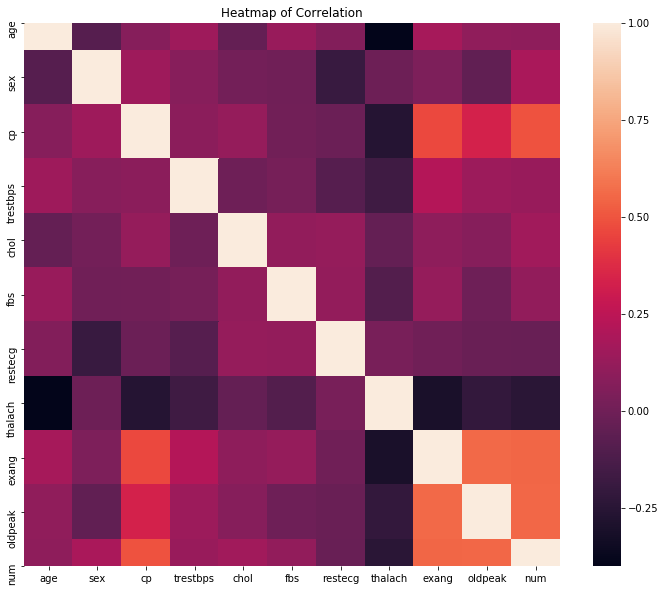

In [14]:
plt.figure(figsize=(12,10))
heat = sns.heatmap(combined_corr)
plt.title('Heatmap of Correlation')

In [15]:
# Normalization
train_data_normalized = train_data
combined_data_normalized = combined_data

train_data_normalized['trestbps'] = z_score(train_data['trestbps'])
train_data_normalized['chol'] = z_score(train_data['chol'])
train_data_normalized['thalach'] = z_score(train_data['thalach'])

combined_data_normalized['trestbps'] = z_score(combined_data['trestbps'])
combined_data_normalized['chol'] = z_score(combined_data['chol'])
combined_data_normalized['thalach'] = z_score(combined_data['thalach'])

In [16]:
# One-Hot Encoding

columns = ['cp', 'restecg', 'oldpeak']
train_data_encoded = encode_onehot(train_data[columns])
combined_data_encoded = encode_onehot(combined_data[columns])

In [71]:
# Split train and test
y_train_normalized = train_data_normalized['num']
y_train_encoded = train_data_normalized['num'].values.reshape(-1, 1)
X_train = train_data_normalized.drop(['num'], axis = 1)

y_combined_normalized = combined_data_normalized['num']
y_combined_encoded = combined_data_normalized['num'].values.reshape(-1, 1)
X_combined = combined_data_normalized.drop(['num'], axis = 1)

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

# K-Means

In [18]:
# Using normalized train data
kmeans = KMeans(n_clusters=2).fit(X_train)
purity(y_train_normalized, kmeans.labels_)

0.8204651162790698

In [19]:
# Using normalized combined data
kmeans = KMeans(n_clusters=2).fit(X_combined)
purity(y_combined_normalized, kmeans.labels_)

0.8101374570446735

# DBSCAN

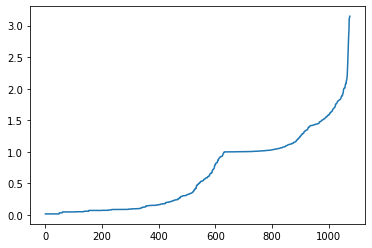

In [62]:
# finding epsilon value with Nearest Neighbor
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_train)
distances, indices = nbrs.kneighbors(X_train)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

The optimal epsilon is at the highest point of curvature

In [144]:
# using normalized train data
dbscan = DBSCAN(eps = 1.1, min_samples = 8).fit(X_train)
purity(y_train_normalized, dbscan.labels_)

0.8204651162790698

In [148]:
# clusters = dbscan.labels_
# colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
# vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
# plt.figure(figsize = (15, 2))
# plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c=vectorizer(clusters))

In [149]:
# np.unique(dbscan.labels_)

In [175]:
# using encoded train data
dbscan = DBSCAN(eps = 1.1, min_samples = 2).fit(X_train)
purity(y_train_encoded, dbscan.labels_)

0.9144186046511628

In [127]:
# using normalized combined data
dbscan = DBSCAN(eps = 1.1, min_samples = 2).fit(X_combined)
purity(y_combined_normalized, dbscan.labels_)

0.897766323024055

In [174]:
# using normalized combined data
dbscan = DBSCAN(eps = 1.1, min_samples = 2).fit(X_combined)
purity(y_combined_encoded, dbscan.labels_)

0.897766323024055

# Agglomerative

In [169]:
# Using normalized train data

agglomerative = AgglomerativeClustering().fit(X_train)
purity(y_train_normalized, agglomerative.labels_)

0.8204651162790698

In [160]:
# Using encoded train data

agglomerative = AgglomerativeClustering().fit(X_train)
purity(y_train_encoded, agglomerative.labels_)

0.8204651162790698

In [161]:
# Using normalized combined data

agglomerative = AgglomerativeClustering().fit(X_combined)
purity(y_combined_normalized, agglomerative.labels_)

0.8101374570446735

In [162]:
# Using encoded combined data

agglomerative = AgglomerativeClustering().fit(X_combined)
purity(y_combined_encoded, agglomerative.labels_)

0.8101374570446735